In [3]:
import yfinance as yf


In [27]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Selecting Apple Stock 

In [8]:
ticker_symbol = "AAPL"
apple_stock = yf.Ticker(ticker_symbol)
historical_data = apple_stock.history(period="3y") 
print(historical_data)

                                 Open        High         Low       Close  \
Date                                                                        
2022-12-27 00:00:00-05:00  129.427431  129.456984  126.806960  128.097488   
2022-12-28 00:00:00-05:00  127.742842  129.082630  123.999322  124.166794   
2022-12-29 00:00:00-05:00  126.087812  128.540804  125.831682  127.683739   
2022-12-30 00:00:00-05:00  126.501579  128.018685  125.536140  127.998978   
2023-01-03 00:00:00-05:00  128.343772  128.954553  122.324579  123.211205   
...                               ...         ...         ...         ...   
2025-12-19 00:00:00-05:00  272.149994  274.600006  269.899994  273.670013   
2025-12-22 00:00:00-05:00  272.859985  273.880005  270.510010  270.970001   
2025-12-23 00:00:00-05:00  270.839996  272.500000  269.559998  272.359985   
2025-12-24 00:00:00-05:00  272.339996  275.429993  272.200012  273.809998   
2025-12-26 00:00:00-05:00  274.160004  275.369995  272.859985  273.399994   

In [9]:
historical_data.reset_index(inplace=True)
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-12-27 00:00:00-05:00,129.427431,129.456984,126.806960,128.097488,69007800,0.0,0.0
1,2022-12-28 00:00:00-05:00,127.742842,129.082630,123.999322,124.166794,85438400,0.0,0.0
2,2022-12-29 00:00:00-05:00,126.087812,128.540804,125.831682,127.683739,75703700,0.0,0.0
3,2022-12-30 00:00:00-05:00,126.501579,128.018685,125.536140,127.998978,77034200,0.0,0.0
4,2023-01-03 00:00:00-05:00,128.343772,128.954553,122.324579,123.211205,112117500,0.0,0.0


In [10]:
historical_data.shape

(753, 8)

In [11]:
historical_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [12]:
historical_data.dtypes

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
dtype: object

In [13]:
historical_data.isnull().sum()


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [14]:
historical_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,753.000000,753.000000,753.000000,753.000000,7.530000e+02,753.000000,753.0
mean,201.794215,203.863149,199.989970,202.036303,5.707133e+07,0.003944,0.0
std,34.553623,34.826013,34.199791,34.529838,2.455706e+07,0.031037,0.0
min,124.137239,125.871071,122.324579,123.161942,1.791060e+07,0.000000,0.0
25%,175.251886,177.240445,174.133903,175.677307,4.381660e+07,0.000000,0.0
50%,196.527967,199.198847,194.324793,196.308716,5.124530e+07,0.000000,0.0
75%,227.033178,228.894754,224.683817,226.940002,6.384130e+07,0.000000,0.0
max,286.200012,288.619995,283.299988,286.190002,3.186799e+08,0.260000,0.0


In [16]:
historical_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
748,2025-12-19 00:00:00-05:00,272.149994,274.600006,269.899994,273.670013,144632000,0.0,0.0
749,2025-12-22 00:00:00-05:00,272.859985,273.880005,270.510010,270.970001,36571800,0.0,0.0
750,2025-12-23 00:00:00-05:00,270.839996,272.500000,269.559998,272.359985,29642000,0.0,0.0
751,2025-12-24 00:00:00-05:00,272.339996,275.429993,272.200012,273.809998,17910600,0.0,0.0
752,2025-12-26 00:00:00-05:00,274.160004,275.369995,272.859985,273.399994,21455300,0.0,0.0


Ploting Graph


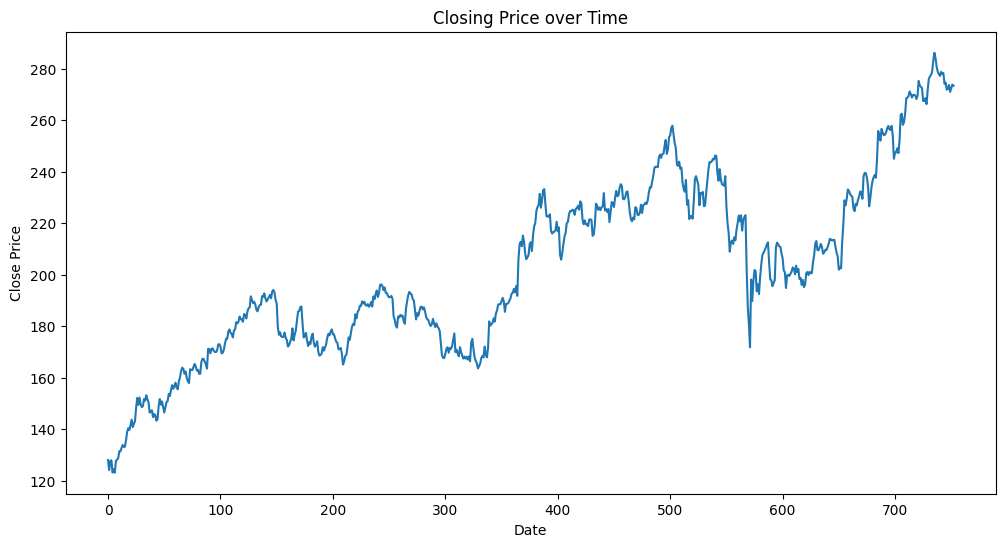

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(historical_data['Close'])
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


Correlation to nidenify dependency 

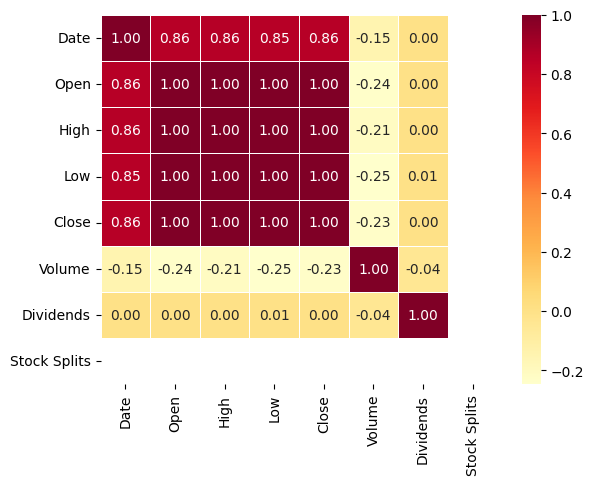

In [ ]:

sns.heatmap(historical_data.corr(), 
            cmap='YlOrRd',  # 'YlOrRd' gives a clear warm (yellow to red) effect
            annot=True,     # Display correlation values in cells
            fmt=".2f",      # Format annotations to 2 decimal places
            linewidths=.5,  # Add lines between cells
            cbar=True)
plt.show()
historical_data['Close'].rolling(window=20).mean().plot()
historical_data['Close'].rolling(window=50).mean().plot()


<Axes: >

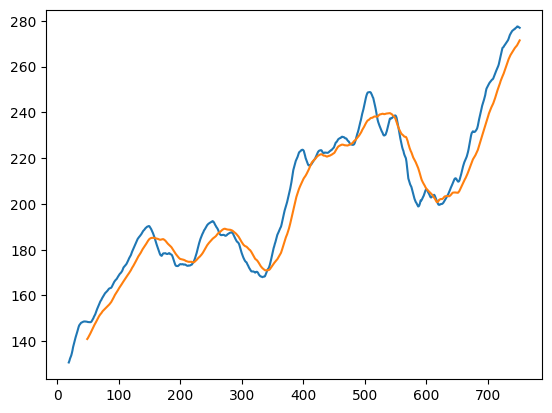

In [20]:
historical_data['Close'].rolling(window=20).mean().plot()
historical_data['Close'].rolling(window=50).mean().plot()


Train Test split Time Based shuffle = False

In [24]:

X = historical_data.drop(["Close", "Date"], axis=1)

y = historical_data["Close"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


Normalization

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Selection 

In [50]:
#  Model Selectio
print("\nSelect Regression model from this:")
print("Linear")
print("Ridge")
print("Polynomial")
print("Random Forest")
regression_model = input("Enter regression model: ").strip()

#  Train Model
if regression_model == "Linear":
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

elif regression_model == "Ridge":
    model = Ridge()
    model.fit(X_train_scaled, y_train)

elif regression_model == "Polynomial":
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    X_train_scaled, X_test_scaled = X_train_poly, X_test_poly  

elif regression_model == "Random Forest":
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

else:
    print("Enter correct regression model")
    exit()


Select Regression model from this:
Linear
Ridge
Polynomial
Random Forest


Calculating Factors 

In [51]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

Display Results

In [52]:
print(f"\nModel trained: {regression_model}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Model trained: Random Forest
Mean Squared Error: 96.39
Root Mean Squared Error: 9.82
R2 Score: 0.88


Getting Data from User 

In [54]:

feature_columns = [col for col in historical_data.columns if col not in ['Close', 'Date']]

print(f"\nEnter {len(feature_columns)} feature values in the same order as: {feature_columns}")


features_input = input("Enter feature values (comma-separated): ").split(',')


features = []
for i, col in enumerate(feature_columns):
    col_type = historical_data[col].dtype
    value = features_input[i].strip()
    
    if 'int' in str(col_type):
        features.append(int(value))
    else:
        features.append(float(value))

print("Processed features:", features)



Enter 6 feature values in the same order as: ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']
Processed features: [129.427431, 129.456984, 126.80696, 69007800, 0.0, 0.0]


Displaying predicted value

In [55]:
features_df = pd.DataFrame([features], columns=feature_columns)


features_array_scaled = scaler.transform(features_df)
if regression_model == "Polynomial":
    features_array_scaled = poly.transform(features_array_scaled)


y_pred_new = model.predict(features_array_scaled)
print(f"Estimated value for the input features {features} is: {y_pred_new[0]:.2f}")


Estimated value for the input features [129.427431, 129.456984, 126.80696, 69007800, 0.0, 0.0] is: 128.45


Ploting Comparisson Graph

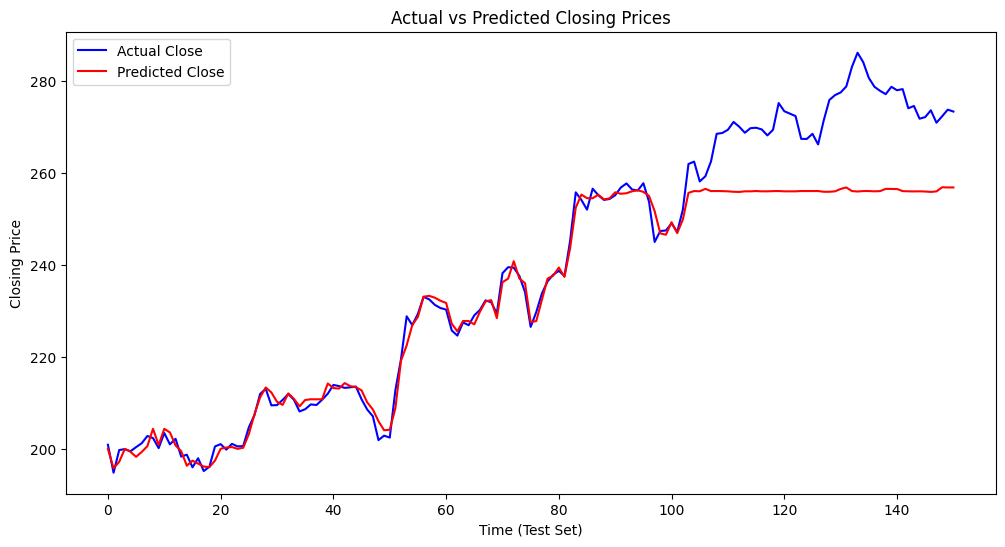

In [56]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))


plt.plot(y_test.values, label='Actual Close', color='blue')


plt.plot(y_pred, label='Predicted Close', color='red')

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time (Test Set)')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
